In [1]:
using Interpolations
using Plots
using PyPlot 
import PyPlot
using LaTeXStrings
using PyCall

In [18]:
using NPZ

In [3]:
pxr = pyimport("pixie_read_st")

PyObject <module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [4]:
na = CartesianIndex();

## Data Loading

In [85]:
filepath = "/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/pixie3d.h5"

"/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/pixie3d.h5"

In [86]:
pxr.pixieload(filepath)

In [380]:
B1c = pxr.load_array(1,0,0,5);
B2c = pxr.load_array(1,1,0,5);
B3c = pxr.load_array(1,2,0,5);

In [381]:
B_1c = pxr.load_array(2,0,0,5);
B_2c = pxr.load_array(2,1,0,5);
B_3c = pxr.load_array(2,2,0,5);

In [89]:
X = pxr.load_array(6,0,0,0);
Z = pxr.load_array(6,2,0,0);

In [90]:
# definitions of cell grid
num_r_cells = size(B3c)[1];
num_u_cells = size(B3c)[2];
num_phi_cells = size(B3c)[3];
dn_r = (1.0/num_r_cells);
dn_u = ((2.0*pi)/num_u_cells);

# Cell-based grid
rc = LinRange(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num_r_cells);
uc = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_u_cells);
phic = LinRange(0.0+(dn_u/2.0),2.0*pi-(dn_u/2.0),num_phi_cells);
tn = LinRange(0, size(B3c)[4]-1,size(B3c)[4]);

# Node-based grid
rn = LinRange(0.0,1.0,(num_r_cells+1));
un = LinRange(0.0,2.0*pi,(num_u_cells+1));
phin = LinRange(0.0,2.0*pi,(num_phi_cells+1));

In [91]:
B1_int = Interpolations.interpolate(B1c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B2_int = Interpolations.interpolate(B2c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B3_int = Interpolations.interpolate(B3c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_1_int = Interpolations.interpolate(B_1c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_2_int = Interpolations.interpolate(B_2c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));
B_3_int = Interpolations.interpolate(B_3c,(BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Periodic(OnCell()))),BSpline(Cubic(Line(OnGrid())))));

In [92]:
B1_sint = scale(B1_int,rc,uc,phic,tn);
B2_sint = scale(B2_int,rc,uc,phic,tn);
B3_sint = scale(B3_int,rc,uc,phic,tn);
B_1_sint = scale(B_1_int,rc,uc,phic,tn);
B_2_sint = scale(B_2_int,rc,uc,phic,tn);
B_3_sint = scale(B_3_int,rc,uc,phic,tn);

In [93]:
B1_eint = extrapolate(B1_sint, (Line(),Periodic(),Periodic(),Line()));
B2_eint = extrapolate(B2_sint, (Line(),Periodic(),Periodic(),Line()));
B3_eint = extrapolate(B3_sint, (Line(),Periodic(),Periodic(),Line()));
B_1_eint = extrapolate(B_1_sint, (Line(),Periodic(),Periodic(),Line()));
B_2_eint = extrapolate(B_2_sint, (Line(),Periodic(),Periodic(),Line()));
B_3_eint = extrapolate(B_3_sint, (Line(),Periodic(),Periodic(),Line()));

In [94]:
B1 = B1_eint(rn,un,phin,tn);
B2 = B2_eint(rn,un,phin,tn);
B3 = B3_eint(rn,un,phin,tn);
B_1 = B_1_eint(rn,un,phin,tn);
B_2 = B_2_eint(rn,un,phin,tn);
B_3 = B_3_eint(rn,un,phin,tn);

## Loading Metric Tensor

In [780]:
metricpath = "/net/scratch3/giannis_kx/FTLE/11/shaped_metric_coeff6.npz"

"/net/scratch3/giannis_kx/FTLE/11/shaped_metric_coeff6.npz"

In [781]:
metric = npzread(metricpath);

In [782]:
grr = metric["grr_do"];
gtt = metric["gtt_do"];
grt = metric["grt_do"];
gpp = metric["gpp_do"];
grp = metric["grp_do"];
gtp = metric["gtp_do"];
radial_grid = metric["radial_grid"];
pol_grid = metric["pol_grid"];
Jac_an = metric["Jacobian"];

## Splining and resizing metric tensor

In [783]:
rm = LinRange(radial_grid[1],radial_grid[end],size(radial_grid)[1]);
um = LinRange(pol_grid[1],pol_grid[end],size(pol_grid)[1]);

In [784]:
grr_int = Interpolations.interpolate(grr, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gtt_int = Interpolations.interpolate(gtt, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gpp_int = Interpolations.interpolate(gpp, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
grt_int = Interpolations.interpolate(grt, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
grp_int = Interpolations.interpolate(grp, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
gtp_int = Interpolations.interpolate(gtp, (BSpline(Cubic(Line(OnGrid()))),BSpline(Cubic(Line(OnGrid())))));
Jac_an_int = Interpolations.interpolate(Jac_an, (BSpline(Cubic(Line(OnCell()))),BSpline(Cubic(Line(OnCell())))));

In [785]:
grr_sint = scale(grr_int,rm,um);
gtt_sint = scale(gtt_int,rm,um);
gpp_sint = scale(gpp_int,rm,um);
grt_sint = scale(grt_int,rm,um);
grp_sint = scale(grp_int,rm,um);
gtp_sint = scale(gtp_int,rm,um);
Jac_an_sint = scale(Jac_an_int,rm,um);

In [786]:
grr_eint = extrapolate(grr_sint,(Line(),Line()));
gtt_eint = extrapolate(gtt_sint,(Line(),Line()));
gpp_eint = extrapolate(gpp_sint,(Line(),Line()));
grt_eint = extrapolate(grt_sint,(Line(),Line()));
grp_eint = extrapolate(grp_sint,(Line(),Line()));
gtp_eint = extrapolate(gtp_sint,(Line(),Line()));
Jac_an_eint = extrapolate(Jac_an_sint,(Line(),Line()));

In [787]:
grr = grr_eint(rn,un);
grt = grt_eint(rn,un);
gpp = gpp_eint(rn,un);
gtt = gtt_eint(rn,un);
grp = grp_eint(rn,un);
gtp = gtp_eint(rn,un);
Jac_an = Jac_an_eint(rn,un);

In [788]:
grrc = grr_eint(rc,uc);
grtc = grt_eint(rc,uc);
gppc = gpp_eint(rc,uc);
gttc = gtt_eint(rc,uc);
grpc = grp_eint(rc,uc);
gtpc = gtp_eint(rc,uc);
Jac_anc = Jac_an_eint(rc,uc);

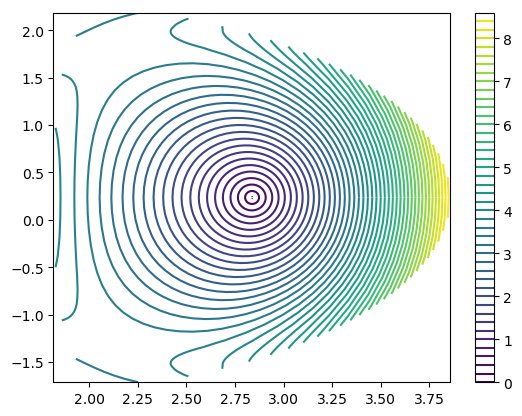

In [886]:
PyPlot.contour(X[:,:,1],Z[:,:,1],Jac_an,50)
PyPlot.colorbar()
PyPlot.show()

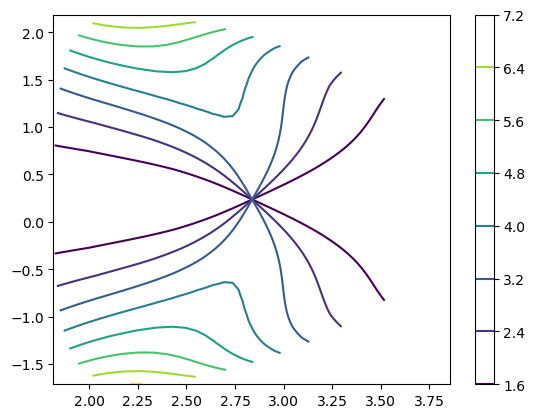

In [893]:
PyPlot.contour(X[:,:,1],Z[:,:,1],grr)
PyPlot.colorbar()
PyPlot.show()

Numerical Jacobian based on $B_r = g_{rr}B^r + g_{r \theta}B^{\theta} + g_{r \phi} B^{\phi}$ $\Longrightarrow$ $B_1 = (g_{rr}B^1 + g_{r \theta}B^{2} + g_{r \phi} B^{3}) \frac{1}{\mathcal{J}}$

In [877]:
Jac_num1 = grrc[:,:,na,na].*(B1c./B_1c) + grtc[:,:,na,na].*(B2c./B_1c) + grpc[:,:,na,na].*(B3c./B_1c);

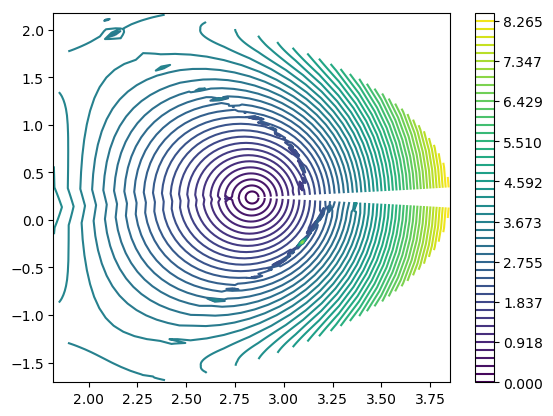

In [878]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Jac_num1[:,:,1,1],levels=LinRange(0,9,50))#200)
PyPlot.colorbar()
PyPlot.show()

In [882]:
Jac_num2 = grtc[:,:,na,na].*(B1c./B_2c) + gttc[:,:,na,na].*(B2c./B_2c) + gtpc[:,:,na,na].*(B3c./B_2c);

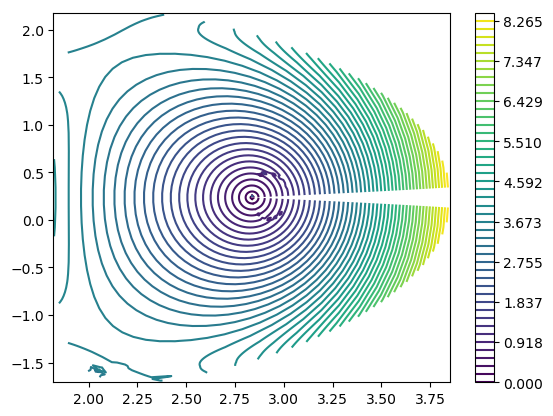

In [883]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Jac_num2[:,:,1,1],levels=LinRange(0,9,50))#200)
PyPlot.colorbar()
PyPlot.show()

In [884]:
Jac_num3 = grpc[:,:,na,na].*(B1c./B_3c) + gtpc[:,:,na,na].*(B2c./B_3c) + gppc[:,:,na,na].*(B3c./B_3c);

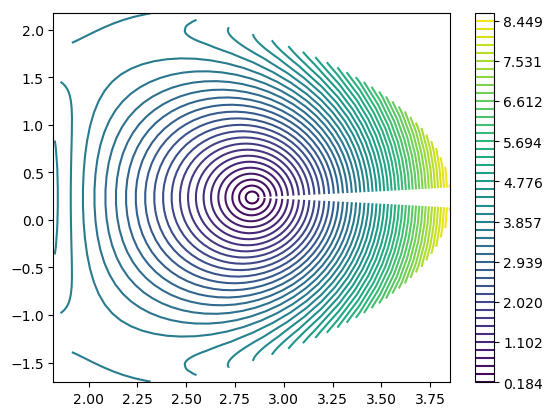

In [885]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Jac_num3[:,:,1,1],levels=LinRange(0,9,50))#200)
PyPlot.colorbar()
PyPlot.show()

Difference is probably numerical noise

## $B^2$ test

## Cartesian Components

In [797]:
Bx = pxr.load_array(0,0,0,5);
By = pxr.load_array(0,1,0,5);
Bz = pxr.load_array(0,2,0,5);

In [798]:
BsqCar = Bx.*Bx .+ By.*By .+ Bz.*Bz;

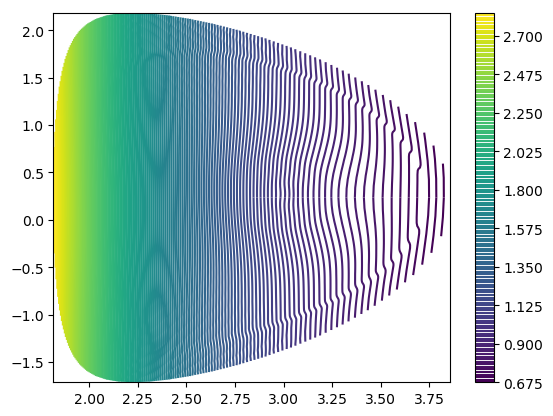

In [799]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],BsqCar[:,:,1,1],200)
PyPlot.colorbar()
PyPlot.show()

### With tensor coefficients

With Cell data

In [791]:
Bsqc_mt = B1c.*B1c.*grrc[:,:,na,na] .+ B2c.*B2c.*gttc[:,:,na,na] .+ B3c.*B3c.*gppc[:,:,na,na] .+ 2*B1c.*B2c.*grtc[:,:,na,na] .+ 2*B1c.*B3c.*grpc[:,:,na,na] .+ 2*B2c.*B2c.*gtpc[:,:,na,na];

In [792]:
BsqJc_mt = Bsqc_mt./(Jac_anc[:,:,na,na].^2);

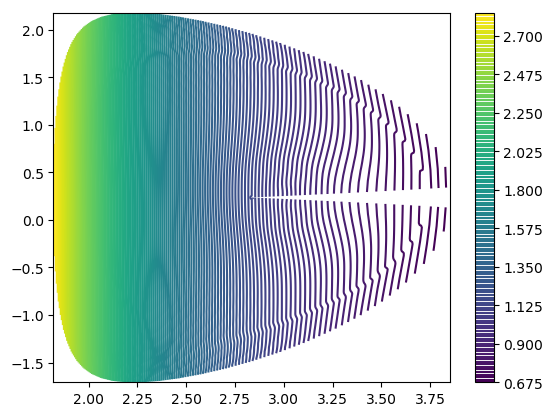

In [793]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],BsqJc_mt[:,:,1,1],200)#levels=LinRange(-1.0,3.0,300))
PyPlot.colorbar()
PyPlot.show()

With node data

In [865]:
Bsqn_mt = B1.*B1.*grr[:,:,na,na] .+ B2.*B2.*gtt[:,:,na,na] .+ B3.*B3.*gpp[:,:,na,na] .+ 2*B1.*B2.*grt[:,:,na,na] .+ 2*B1.*B3.*grp[:,:,na,na] .+ 2*B2.*B2.*gtp[:,:,na,na];

In [866]:
BsqJn_mt = Bsqn_mt./(Jac_an[:,:,na,na].^2);

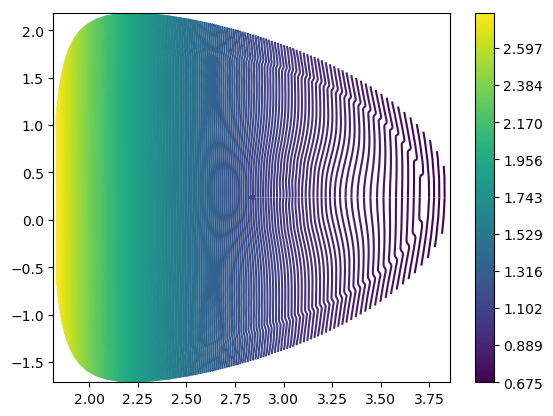

In [869]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],BsqJn_mt[:,:,1,1],levels=LinRange(0.675,2.8,200))
PyPlot.colorbar()
PyPlot.show()

### With Contravariant and Covariant components

With Cell data

In [800]:
Bsq = (B1c.*B_1c .+ B2c.*B_2c .+ B3c.*B_3c)./Jac_anc[:,:,na,na];

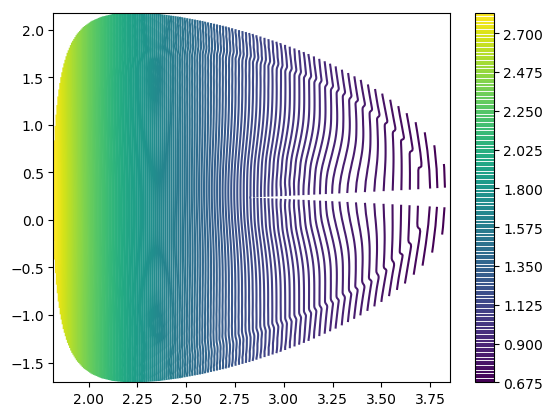

In [801]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Bsq[:,:,1,1],200)#levels=LinRange(0.0,0.7,300))
PyPlot.colorbar()
PyPlot.show()

With node data

In [802]:
Bsqn = (B1.*B_1 .+ B2.*B_2 .+ B3.*B_3)./Jac_an[:,:,na,na];

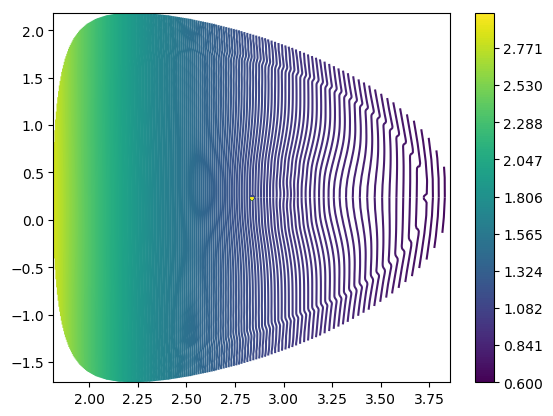

In [803]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],Bsqn[:,:,1,1],levels=LinRange(0.6,3.0,200))
PyPlot.colorbar()
PyPlot.show()

## Extra Plots

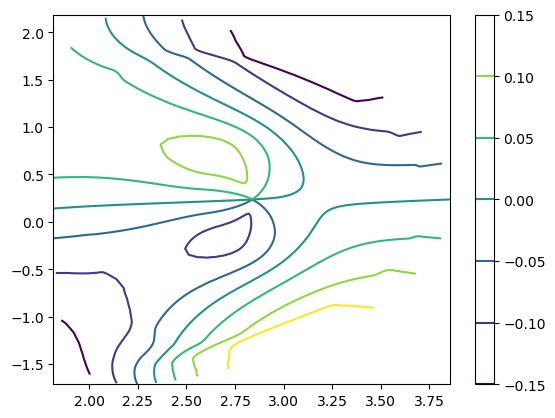

In [899]:
PyPlot.contour(pxr.X[:,:,1],pxr.Z[:,:,1],B_1[:,:,1,1])
PyPlot.colorbar()
PyPlot.show()

In [917]:
Bp = (B1c.*B_1c .+ B2c.*B_2c)./Jac_anc[:,:,na,na];

In [923]:
Bp_mt = ((B1c.*B1c).*grrc[:,:,na,na] .+ (B2c.*B2c).*gttc[:,:,na,na] .+ 2*(B1c.*B2c).*grtc[:,:,na,na])./(Jac_anc[:,:,na,na].^2);

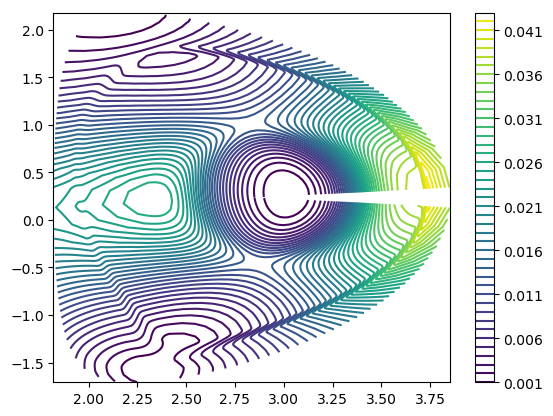

In [918]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Bp[:,:,1,1],50)
PyPlot.colorbar()
PyPlot.show()

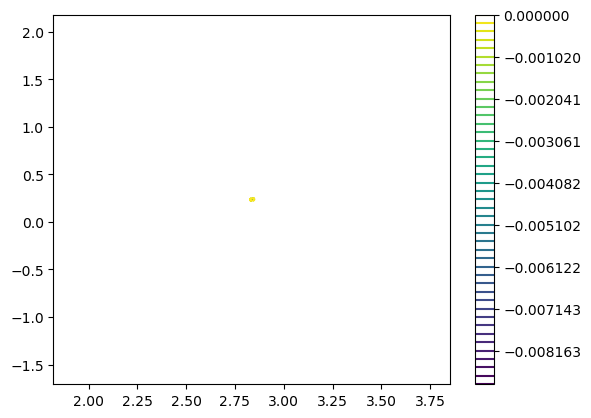

In [932]:
PyPlot.contour(pxr.Xc[:,:,1],pxr.Zc[:,:,1],Bp_mt[:,:,1,1],levels=LinRange(-0.01,0.0,50))#50)
#PyPlot.xlim(2.75,2.8)
#PyPlot.ylim(0.0,0.3)
PyPlot.colorbar()
PyPlot.show()